In [2]:
## Import libs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import sys
from datetime import datetime
import pylab
from scipy.stats import lognorm, norm, poisson, kurtosis, laplace, shapiro, levy, gamma,truncnorm, probplot,kstest
from scipy.stats import levy 


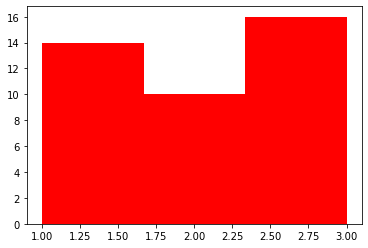

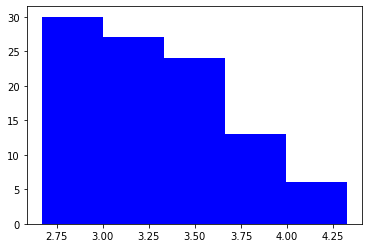

[1, 3, 3, 1, 2]

array([3.32614586, 3.38655516, 2.78250383, 3.21078932, 3.13460574])

97.18253158075501

216.66666666666666

97.18253158075501

In [3]:
## Data imports / creation

random.seed(3) ## get the same rand numbers each time
Freq = [random.randint(1,3) for iter in  range(40)] # creates random frequency numbers between 0-3 for 40 years


Sev = [300,300,150,150,200,400,200,200,50] # actual data
mu = np.mean(Sev)
stdF = np.std(Sev)

distF = truncnorm(50/stdF, mu / stdF, loc=mu, scale=stdF) 
random.seed(3)
SevR = distF.rvs(100)/100


FreqPlot1 = plt.hist(Freq, bins = 3 ,color = "red") ## visualise the samples
plt.show(FreqPlot1)
SevPlot1 = plt.hist(SevR,bins = 5, color = "blue") ## visualise the samples
plt.show(SevPlot1)

Freq[:5]
SevR[:5]
stdF
mu
stdF



2.05


<Figure size 720x432 with 0 Axes>

<BarContainer object of 9 artists>

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'Loss Frequency Distribution')

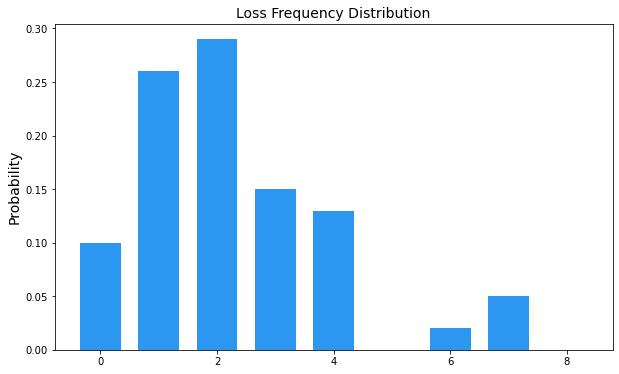

In [4]:
## Estimate frequency distriubution , poisson

# calculate the lambda parameter, either use the random numbers or 1, uncomment appropriately 

lamda = np.sum(Freq) / (len(Freq)) # it is 2.05 using random numbers
#lamda = 1 # actual data assuming 1 loss event per year
print(lamda)

# draw random variables from a Poisson distribtion with lambda
prvs = poisson.rvs(lamda, size=(100))
 
# plot the pdf, loss frequency distribution
h = plt.hist(prvs, bins=range(0, 10))
plt.close("all")
y = h[0]/np.sum(h[0])
x = h[1]
 
plt.figure(figsize=(10, 6))
plt.bar(x[:-1], y, width=0.7, align='center', color="#2c97f1")
plt.ylabel("Probability", fontsize=14)
plt.title("Loss Frequency Distribution", fontsize=14)

(array([0.90848096, 0.81763286, 0.72678477, 0.39367508, 0.18169619]),
 array([2.67119348, 3.00141504, 3.3316366 , 3.66185816, 3.99207972,
        4.32230129]),
 <a list of 5 Patch objects>)

Text(0.5, 1.0, 'Severity Loss Normal Distribution: mu = 3.29 , std = 0.41')

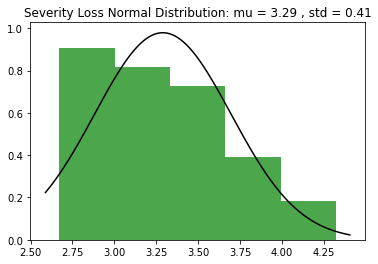

In [5]:
## Estimate severity distribution: Normal

# fit distribution to data
mu, std = norm.fit(SevR)

# hist
plt.hist(SevR,bins=5, density=True, alpha=0.7, color='g')

# Plot the pdf
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,1000)
npdf = norm.pdf(x,mu,std)
plt.plot(x,npdf,'k')
title = "Severity Loss Normal Distribution: mu = %.2f , std = %.2f" % (mu,std)
plt.title(title)

plt.show()

(array([0.90848096, 0.81763286, 0.72678477, 0.39367508, 0.18169619]),
 array([2.67119348, 3.00141504, 3.3316366 , 3.66185816, 3.99207972,
        4.32230129]),
 <a list of 5 Patch objects>)

(2.0, 5.0)

Text(0.5, 1.0, 'Severity Distribution')

Text(0.5, 0, 'Loss ($100Ms)')

Text(0, 0.5, 'N')

67.31951373160358 0 0.048860199483721785


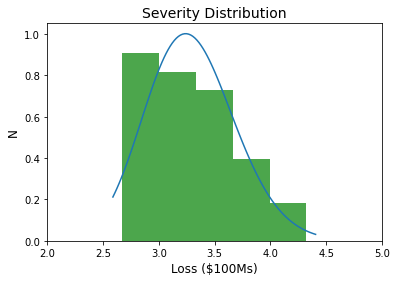

In [9]:
## Estimate severity distribution: Gamma

# hist
plt.hist(SevR,bins=5, density=True, alpha=0.7, color='g')


# Plot the pdf
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)


a,loc,scale = gamma.fit(SevR,floc=0)
y = gamma.pdf(x,a,loc,scale)
plt.plot(x,y)
plt.xlim([2, 5])
plt.title("Severity Distribution", fontsize=14)
plt.xlabel("Loss ($100Ms)", fontsize=12)
plt.ylabel("N", fontsize=12)

print(a, loc, scale)

In [ ]:
## Estimate severity distribution: Log Normal

#y = np.log(SevR)


y  = sevR



plt.hist(y, bins=5, density=True, alpha=0.7, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)

sig, loc, scale = lognorm.fit(y)
pdf = lognorm.pdf(x, sig, loc=loc, scale=scale)
plt.plot(x, pdf, 'r')
plt.xlim([2, 5])
plt.title("Severity Distribution", fontsize=14)
plt.xlabel("Loss ($100Ms)", fontsize=12)
plt.ylabel("N", fontsize=12)
 
print(sig, loc, scale)  # lognormal pdf's parameters

y[:5]


In [ ]:
## Monte Carlo log normal

# The parameters loc,sig, scale + others would need to be adjusted depending on the severity distribution we use.
# If we change our poisson dist, we also need to add the approriate parameters in 
random.seed(3)
def loss(r, loc, sig, scale, lamda):
    X = []
    for x in range(11):  # up to 10 loss events considered
        if(r < poisson.cdf(x, lamda)):  # x denotes a loss number
            out = 0
        else:
            out = lognorm.rvs(s=sig, loc=loc, scale=scale)
        X.append(out)
    return np.sum(X)  # = L_1 + L_2 + ... + L_n
    
 
# run 10k Monte Carlo simulations
losses = []
for _ in range(10000):   # change number to run N amounts of sims
    random.seed(3)
    r = np.random.random()
    losses.append(loss(r, loc, sig, scale, lamda))
    
 
h = plt.hist(losses, bins=range(0, 30))
_ = plt.close("all")
y = h[0]/np.sum(h[0])
x = h[1]
 
plt.figure(figsize=(10, 6))
plt.bar(x[:-1], y, width=0.7, align='center', color="#ff5a19")
plt.title("Modelled Loss Distribution - log normal", fontsize=14)
plt.xlabel("Loss ($100Ms)", fontsize=12)
plt.ylabel("Probability of Loss", fontsize=12)

In [ ]:
## Monte Carlo gamma

# The parameters loc,sig, scale + others would need to be adjusted depending on the severity distribution we use.
# If we change our poisson dist, we also need to add the approriate parameters in 
random.seed(3)
def loss(r, loc, a, scale, lamda):
    X = []
    for x in range(11):  # up to 10 loss events considered
        if(r < poisson.cdf(x, lamda)):  # x denotes a loss number
            out = 0
        else:
            out = gamma.rvs(a=a, loc=loc, scale=scale)
        X.append(out)
    return np.sum(X)  # = L_1 + L_2 + ... + L_n
    
 
# run 10k Monte Carlo simulations
losses = []
for _ in range(10000):   # change number to run N amounts of sims
    random.seed(3)
    r = np.random.random()
    losses.append(loss(r, loc, a, scale, lamda))
    
 
h = plt.hist(losses, bins=range(0, 30))
_ = plt.close("all")
y = h[0]/np.sum(h[0])
x = h[1]
 
plt.figure(figsize=(10, 6))
plt.bar(x[:-1], y, width=0.7, align='center', color="#ff5a19")
plt.title("Modelled Loss Distribution - gamma", fontsize=14)
plt.xlabel("Loss ($100Ms)", fontsize=12)
plt.ylabel("Probability of Loss", fontsize=12)

In [ ]:
## QQ plot lognormal dist

probplot(SevR, dist="lognorm",sparams=(sig), plot=pylab) ## uses shape parameter from lognormal in QQ plot
pylab.show()



In [ ]:
## QQ plot gamma dist
mu = np.mean(SevR)

probplot(SevR, dist="gamma",sparams=(mu), plot=plt) ## uses shape parameter from lognormal in QQ plot
#pylab.show()


In [ ]:
## Kolomogorov-smirnoff test

kstest(Freq, 'poisson',args=(lamda,)) ## test that our frequency data fits a poisson distribution

## p-value is less than 0.05, so we cannot reject the null that they are the same dist.



In [ ]:
kstest(SevR, 'gamma',args=(mu,))

In [ ]:
kstest(SevR, 'lognorm',args=(sig,))